In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd
import h5py
import copy
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

In [2]:
lat = pd.read_csv('F:\\gitCCA\\cca-jupyter\\testdata\\latitud.dat')
lon = pd.read_csv('F:\\gitCCA\\cca-jupyter\\testdata\\longitud.dat')
zname = pd.read_csv('F:\\gitCCA\\cca-jupyter\\testdata\\acummulated.dat')

In [9]:
# test para leer, filtrar y escribir
inname = "f:\\jupyter\\test2.h5"
outname = "f:\\jupyter\\testout.h5"

latpoint = 19.5                              # latitud del punto de interes
lonpoint = -99.5                                # longitud del punto de interes
gridsize = 0.4

datos=h5py.File(inname,'r')

grid_max_lat = latpoint + gridsize
grid_min_lat = latpoint - gridsize
grid_max_lon = lonpoint - gridsize
grid_min_lon = lonpoint + gridsize

gridname = '%iN%iW' % (int(latpoint),int(lonpoint))
lat2 = datos[gridname]["/latitude"]
lon2 = datos[gridname]["/longitude"]
z2 = datos[gridname]['/xco2']

print(lat2,lon2,z2)

gridcond = ((lat2 <= grid_max_lat) & (lat2 >= grid_min_lat) & (lon2 <= grid_min_lon) & (lon2 >= grid_max_lon))

print(gridcond)
#filterdata = datos[gridname][gridcond]

lat3 = copy.copy(lat2[gridcond])
lon3 = copy.copy(lon2[gridcond])
z3 = copy.copy(z2[gridcond])

print(lat3.shape,lon3.shape,z3.shape)

datos.close()

[19.08132  19.123571 19.118988 19.072357 19.093502 19.06764  19.088675
 19.109625 19.062628 19.207203 19.223186 19.109629 19.197935 19.214317
 19.065672 19.065683 19.097569 19.097952 19.114119 19.113884 19.178465
 19.130089 19.146519 19.146385 19.162848 19.211483 19.162731 19.195591
 19.21145  19.228468 19.244932 19.260994 19.261164 19.26113  19.277384
 19.293457 19.342112 19.277346 19.293592 19.309656 19.341928 19.358326
 19.277058 19.293545 19.309795 19.32587  19.342106 19.358294 19.374554
 19.293268 19.309727 19.326002 19.358328 19.390768 19.342224 19.358303
 19.374537 19.342093 19.358421 19.374477 19.390747 19.406935 19.423185
 19.374643 19.39071  19.40695  19.439392 19.423155 19.439344 19.455597
 19.107964 19.13558  19.173147 19.286364 19.288942 19.291391 19.305017
 19.332094 19.307543 19.310211 19.32371  19.298855 19.312727 19.3264
 19.339874 19.366999 19.342598 19.356083 19.36966  19.383186 19.331345
 19.34517  19.358788 19.372269 19.385862 19.333645 19.361326 19.374987
 19.3884

TypeError: Input z must be 2D, not 1D

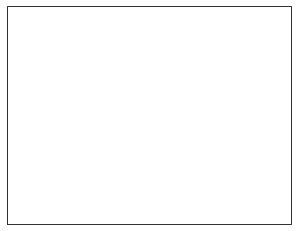

In [10]:
fname = 'F:\\jupyter\\shapefiles\\st_mx.shp'

ax = plt.axes(projection=ccrs.Robinson())
shape_feature = ShapelyFeature(Reader(fname).geometries(),
                                ccrs.PlateCarree(), facecolor='none', edgecolor='black')
ax.set_extent((-101,-97,18,21))
plt.contourf(lon3, lat3, z3, 60,
             transform=ccrs.PlateCarree())
ax.add_feature(shape_feature)
plt.show()

In [6]:
datos.close()